In [1]:
#Importing important libraries :
import numpy as np                # linear algebra
import pandas as pd               # data processing
import matplotlib.pyplot as plt   # visualisation
import matplotlib.ticker as mtick # For specifying axes tick format 
import scipy
import scipy.stats
import seaborn as sns             # visualisation   
%matplotlib inline  
sns.set(color_codes=True)
import csv

# **Importing Data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Getting the dataset and displaying it :
df = pd.read_csv('/content/gdrive/My Drive/Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Cleaning**

In [4]:
#Removing the unused or irrelevant columns :
to_drop = ['CustomerId',
           'RowNumber',
          'Surname']
df.drop(to_drop, inplace = True, axis = 1)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Renaming the column names :
new_name = {'HasCrCard':'HasCreditCard',
           'Exited':'Churn'}
df.rename(columns = new_name, inplace = True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Replacing the value of the rows :
replace_values = {0: 'No',
                 1: 'Yes'}
df = df.replace({"Churn": replace_values, "HasCreditCard": replace_values, "IsActiveMember": replace_values})

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [7]:
#Checking the types of data :
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCreditCard       object
IsActiveMember      object
EstimatedSalary    float64
Churn               object
dtype: object

In [8]:
df.shape

(10000, 11)

In [9]:
#Duplicate rows :
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [10]:
#Missing or null values :
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64


# **Exploratory data analysis**

In [11]:
df.Churn.value_counts()

No     7963
Yes    2037
Name: Churn, dtype: int64

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


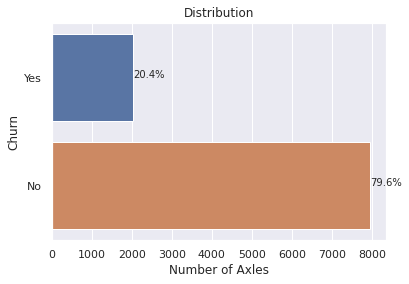

In [13]:
#Plot of Churn Distribution
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution')
    plt.xlabel('Number of Axles')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

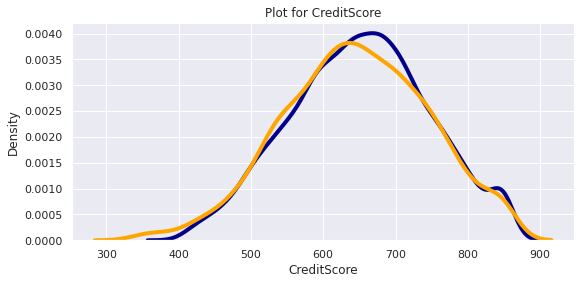

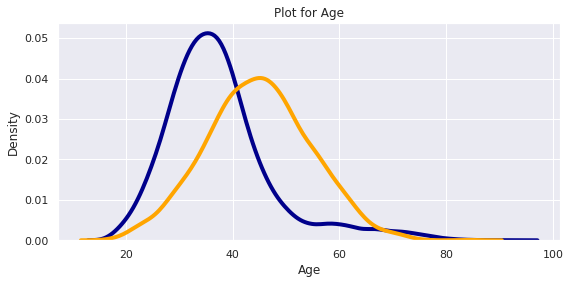

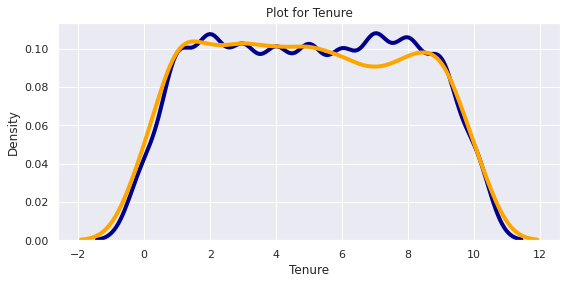

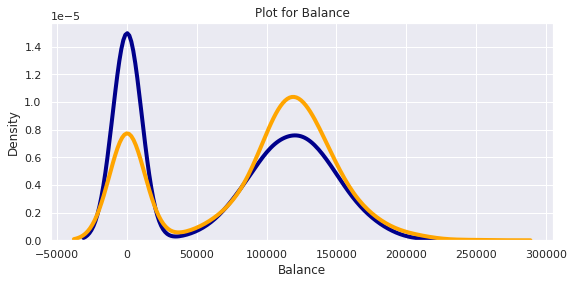

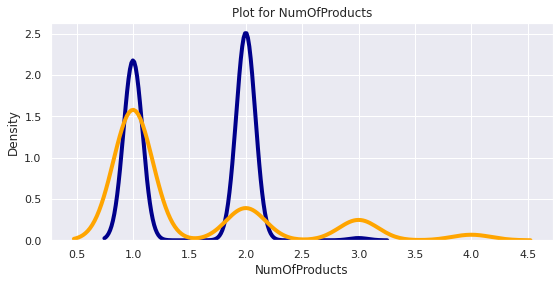

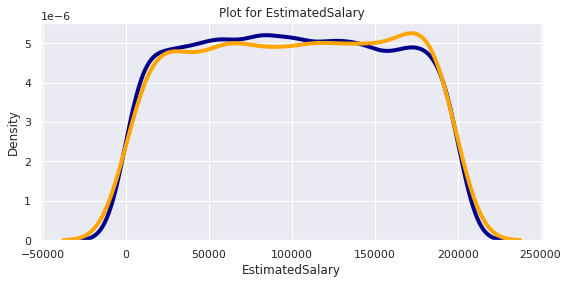

In [14]:
#Numerical features
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.savefig('kde.png')
kdeplot('CreditScore', hist = False, kde = True)
kdeplot('Age', hist = False, kde = True)
kdeplot('Tenure', hist = False, kde = True)
kdeplot('Balance', hist = False, kde = True)
kdeplot('NumOfProducts', hist = False, kde = True)
kdeplot('EstimatedSalary', hist = False, kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


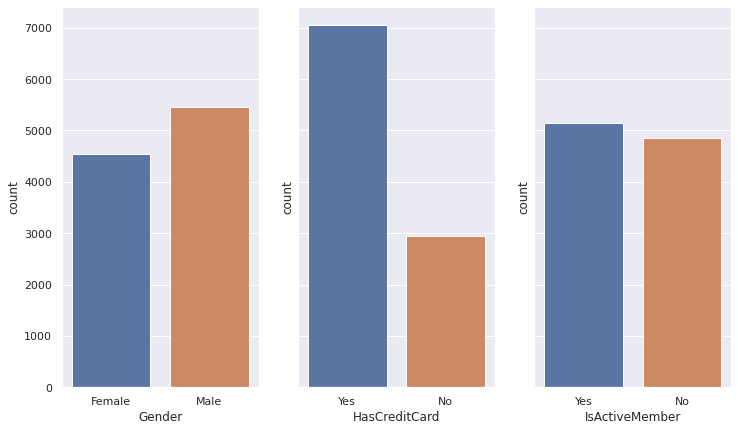

In [15]:
#Binary Features
fig, axes = plt.subplots(1, 3, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0])
sns.countplot("HasCreditCard", data=df, ax=axes[1])
sns.countplot("IsActiveMember", data=df, ax=axes[2])
fig.savefig("inp.png")

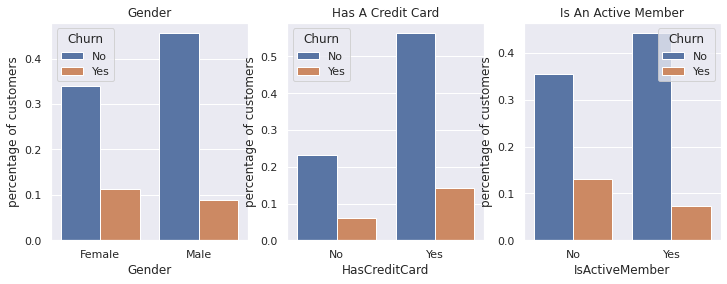

In [16]:
fig, axis = plt.subplots(1, 3, figsize=(12,4))
axis[1].set_title("Has A Credit Card")
axis[0].set_title("Gender")
axis[2].set_title("Is An Active Member")
axis_y = "percentage of customers"
# Plot HasCreditCard column
gp_HasCreditCard = df.groupby('HasCreditCard')["Churn"].value_counts()/len(df)
gp_HasCreditCard = gp_HasCreditCard.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='HasCreditCard', y= axis_y, hue='Churn', data=gp_HasCreditCard, ax=axis[1])
# Plot IsActiveMember column
gp_IsActiveMember = df.groupby('IsActiveMember')["Churn"].value_counts()/len(df)
gp_IsActiveMember = gp_IsActiveMember.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='IsActiveMember', y= axis_y, hue='Churn', data=gp_IsActiveMember, ax=axis[2])
# Plot Gender column
gp_Gender = df.groupby('Gender')["Churn"].value_counts()/len(df)
gp_Gender = gp_Gender.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Gender', y= axis_y, hue='Churn', data=gp_Gender, ax=axis[0])


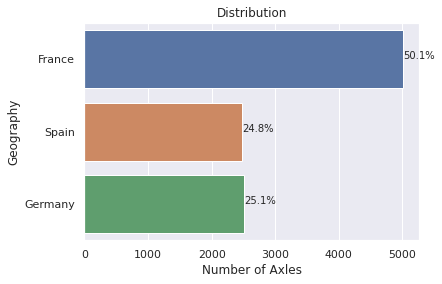

In [17]:
bar_plot(df, "Geography")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


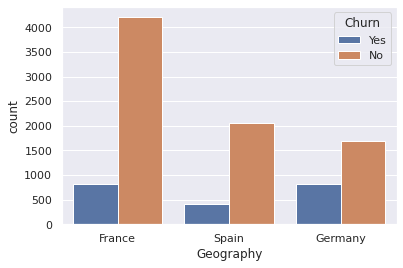

In [18]:
sns.countplot("Geography", data=df, hue = 'Churn')


> **Correlation Between Features**



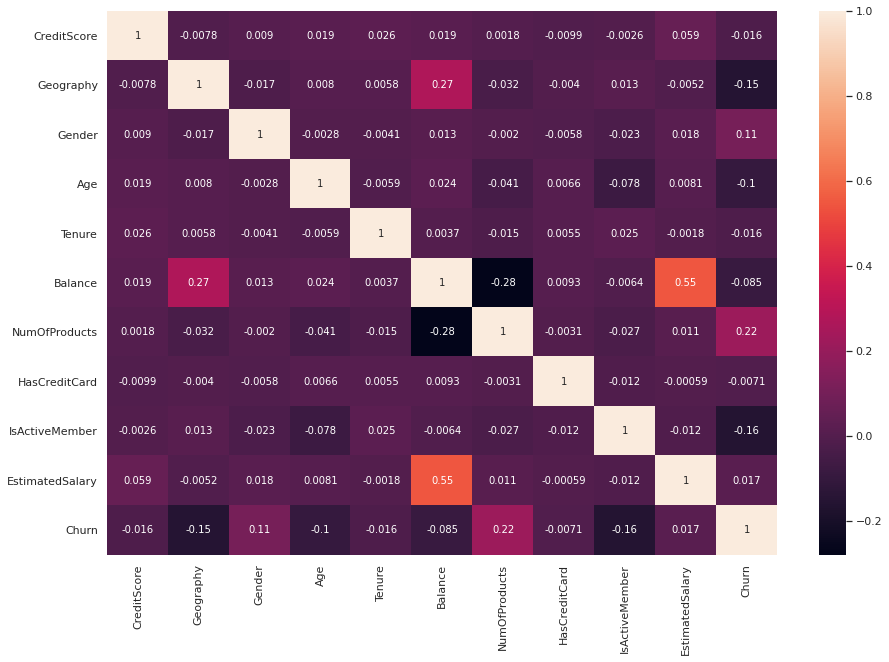

In [19]:
plt.figure(figsize=(15, 10))
df_corr = df.apply(lambda x: pd.factorize(x)[0])
sns.heatmap(df_corr.corr(), annot=True)

# **Data preprocessing : Label Encoding & One  Hot Encoding**

In [20]:
'''
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing them
df['Geography'] = labelencoder.fit_transform(df['Geography'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
'''

"\n# Label Encoding\nfrom sklearn.preprocessing import LabelEncoder\n\n# creating instance of labelencoder\nlabelencoder = LabelEncoder()\n\n# Assigning numerical values and storing them\ndf['Geography'] = labelencoder.fit_transform(df['Geography'])\ndf['Gender'] = labelencoder.fit_transform(df['Gender'])\n"

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [22]:
# One Hot Encoding

# Get one hot encoding of column Geography
geography_dummies = pd.get_dummies(df['Geography'], prefix='Geography')

# Get one hot encoding of column Gender
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

print(geography_dummies.head())
print(gender_dummies.head())

   Geography_France  Geography_Germany  Geography_Spain
0                 1                  0                0
1                 0                  0                1
2                 1                  0                0
3                 1                  0                0
4                 0                  0                1
   Gender_Female  Gender_Male
0              1            0
1              1            0
2              1            0
3              1            0
4              1            0


In [23]:
# Drop column Geography as it is now encoded
df.drop(['Geography'], inplace = True, axis = 1)
# Join the encoded df
df = pd.concat([df, pd.DataFrame(geography_dummies)], axis=1)

# Drop column Gender as it is now encoded
df.drop(['Gender'], inplace = True, axis = 1)
# Join the encoded df
df = pd.concat([df, pd.DataFrame(gender_dummies)], axis=1)

df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,Yes,Yes,101348.88,Yes,1,0,0,1,0
1,608,41,1,83807.86,1,No,Yes,112542.58,No,0,0,1,1,0
2,502,42,8,159660.80,3,Yes,No,113931.57,Yes,1,0,0,1,0
3,699,39,1,0.00,2,No,No,93826.63,No,1,0,0,1,0
4,850,43,2,125510.82,1,Yes,Yes,79084.10,No,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,Yes,No,96270.64,No,1,0,0,0,1
9996,516,35,10,57369.61,1,Yes,Yes,101699.77,No,1,0,0,0,1
9997,709,36,7,0.00,1,No,Yes,42085.58,Yes,1,0,0,1,0
9998,772,42,3,75075.31,2,Yes,No,92888.52,Yes,0,1,0,0,1


In [24]:
#Replacing the value of the rows :
replace_values = {'No': 0,
                 'Yes': 1}
df = df.replace({"Churn": replace_values, "HasCreditCard": replace_values, "IsActiveMember": replace_values})

In [25]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# **Oversampling Technique**

In [26]:
from imblearn.over_sampling import SMOTE
df.head()
x=df.drop('Churn', axis=1)
y = df['Churn']
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
#y_resampled.value_counts()

In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# **Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

In [31]:
X_train.shape

(12740, 13)

# **Model Selection**

Compare Baseline Classification Algorithms (1st Iteration):

In [32]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 42,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 42)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 42)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 42)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_results.append(cv_acc_results)
# roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,round(cv_auc_results.mean()*100, 2),round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# **Logistic Regression**

## **Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [ ]:
model, predicted, probs = logistic_regression(X_train, X_test, y_train, y_test)

## **Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test

# predicted values
#predicted = y_pred

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n\n',matrix)

In [ ]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

In [ ]:
# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(actual, predicted, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n\n',matrix)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(actual, predicted)

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(actual, predicted, average=None)

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_score(actual, predicted, average=None)

In [ ]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(actual, predicted, average=None)

# **Random Forest**

## **Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

In [ ]:
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

## **Evaluation**

In [ ]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))